In [1]:
# Assignment 3 code for CTA200 2025 by Nicole Jiang

# Import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


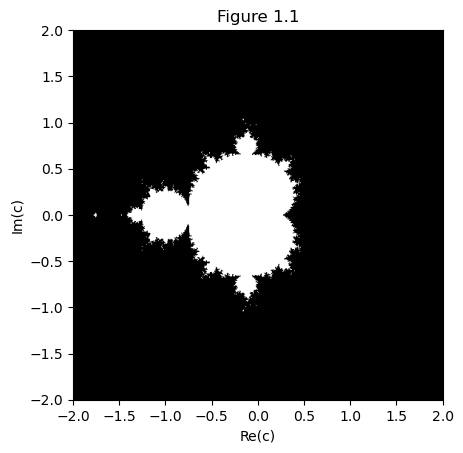

In [2]:
# Question 1
# Plot 1: Points c that diverge are given one colour and points c within bounds are given another:

# Import iteration code and call function 
import q1_plot1 as q1plt1
diverged = q1plt1.iterate_q1_plot1(N=500, z=0, max_iter=30) 

# Plot 
plt.imshow(diverged, origin="lower", extent=[-2,2,-2,2], cmap="gray_r")  # Colour in reverse grayscale. Black is what has diverged (True) and white are points that did not escape (False)
# Labels 
plt.xlabel ("Re(c)")  # Real part
plt.ylabel("Im(c)")  # Imaginary part 
plt.title("Figure 1.1")  # Figure for question 1, plot 1 
# Show 
plt.show()

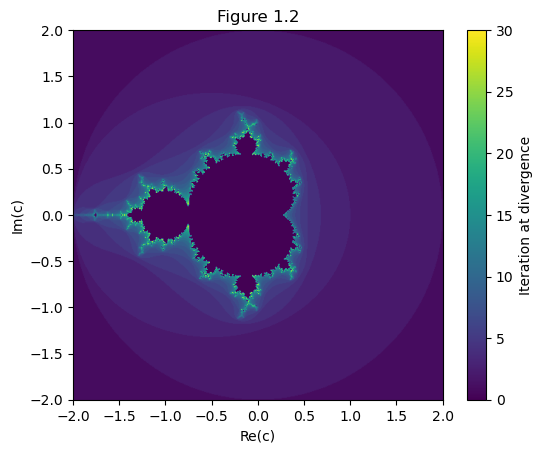

In [5]:
# Plot 2: Points coloured by a colour scale which indicatea the iteration number at which the given point diverges:

# Import iteration code and call function 
import q1_plot2 as q1plt2
count = q1plt2.iterate_q1_plot2(N=500, z=0, max_iter=30)

# Plot and colour
plt.imshow(count, origin="lower", extent=[-2,2,-2,2],cmap="viridis")
# Labels 
plt.colorbar(label="Iteration at divergence")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Figure 1.2")  # Figure for question 1, plot 2 
# Show 
plt.show()

In [7]:
# Question 2
# Defining a function for Lorenz' equations: 

def lorenz(t, W, sigma, r, b) -> np.ndarray :
    """ Performs Lorenz' equations 25-27 to find [dx/dt, dy/dt, dz/dt]. 

    Parameters: 
    - t: float, dimensionless time
    - W: np.ndarray or list of floats, the vector [x, y, z] where: 
        - x: float, convection rate
        - y: float, horizontal variation
        - z: float, vertical variation
    - sigma: float, Prandtl number, the ratio of the kinematic viscosity to the thermal diffusivity 
    - r: int, Rayleigh number
    - b: float, dimensionless length scale

    Returns:
    - [dx/dt, dy/dt, dz/dt] : np.ndarray, a 1D array of floats representing the vector of the rates of change of x, y, and z with respect to dimensionless time
    
    """
    
    # Unpack W
    x, y, z = W
    
    # Lorentz' equations for derivatives of x, y, z with respect to time 
    xprime = -1 * sigma * (x - y)
    yprime = r * x - y - x * z
    zprime = -1 * b * z + x * y

    # Return vector as an array 
    return np.array([xprime, yprime, zprime])
    

In [9]:
# ODE solver to integrate for t = 60.0

# Initial conditions and parameters
W = [0., 1., 0.]  
t_span = (0.0, 60.0)
args = (10., 28, 8./3.)

# Evaluation values for t
t = np.linspace(t_span[0], t_span[1], 6001)  # 6001 because N must = 3000 for next part and N = t/dt and dt = 0.01

# Integrate the Equation 
sol = solve_ivp(fun=lorenz, t_span=t_span, y0 = W, args=args, t_eval=t) 

# Answer 
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  5.999e+01  6.000e+01]
        y: [[ 0.000e+00  9.512e-02 ...  1.533e+00  1.627e+00]
            [ 1.000e+00  1.004e+00 ...  2.422e+00  2.622e+00]
            [ 0.000e+00  4.790e-04 ...  1.389e+01  1.356e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5702
     njev: 0
      nlu: 0


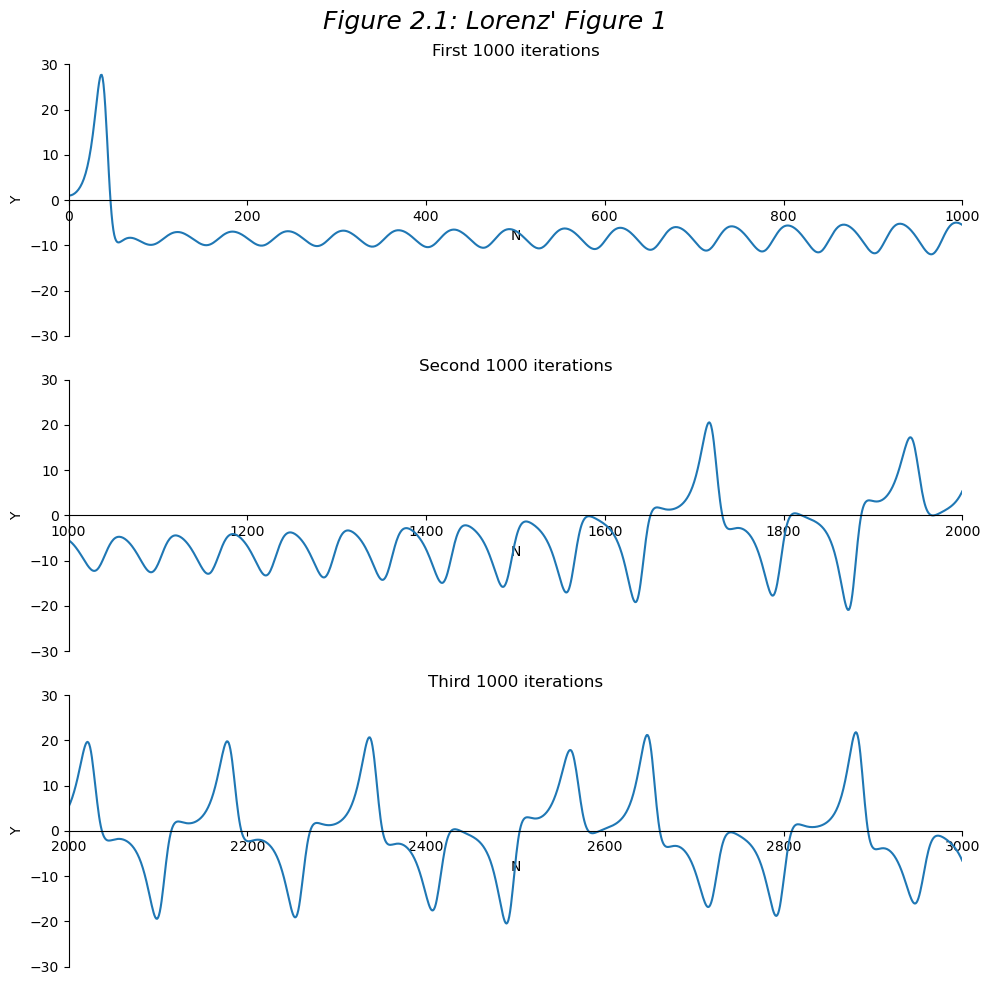

In [11]:
# Reproducing Lorenz' Figure 1: 3 graphs, each of Y as a function of time for 1000 iterations 

# Get values for axes 
y = sol.y[1]  
dt = 0.01  # timestep 
N = sol.t / dt  
interval = 1000

# Plot Lorenz' Fig 1 but with axes labels
fig, ax = plt.subplots(3, 1, dpi=100, figsize=(10, 10)) 

ax[0].plot(N[:interval + 1], y[:interval + 1])  # First 1000
ax[0].set_title('First 1000 iterations')  
ax[0].set_xlim(0, 1000)  # Make function go to edge of x axis

ax[1].plot(N[interval:(2 * interval) + 1], y[interval:(2 * interval) + 1])  # Second 1000
ax[1].set_title('Second 1000 iterations')
ax[1].set_xlim(1000, 2000)

ax[2].plot(N[(2 * interval):(3 * interval) + 1], y[(2 * interval):(3 * interval) + 1])  # Third 1000
ax[2].set_title('Third 1000 iterations')
ax[2].set_xlim(2000, 3000)

for i in range(3):  
    ax[i].set_xlabel('N')  
    ax[i].set_ylabel('Y')
    ax[i].set_ylim(-30, 30)  # Making y-axis symmetrical
    ax[i].spines['bottom'].set_position(('data', 0))  # Setting x-axis on y = 0
    ax[i].spines['top'].set_visible(False)  # Hiding bars for cleaner look
    ax[i].spines['right'].set_visible(False)
    
fig.suptitle('Figure 2.1: Lorenz\' Figure 1', fontstyle='italic', fontsize = 18)  # Figure for question 2 plot 1
plt.tight_layout()  # Cleaner layout 
plt.show()   

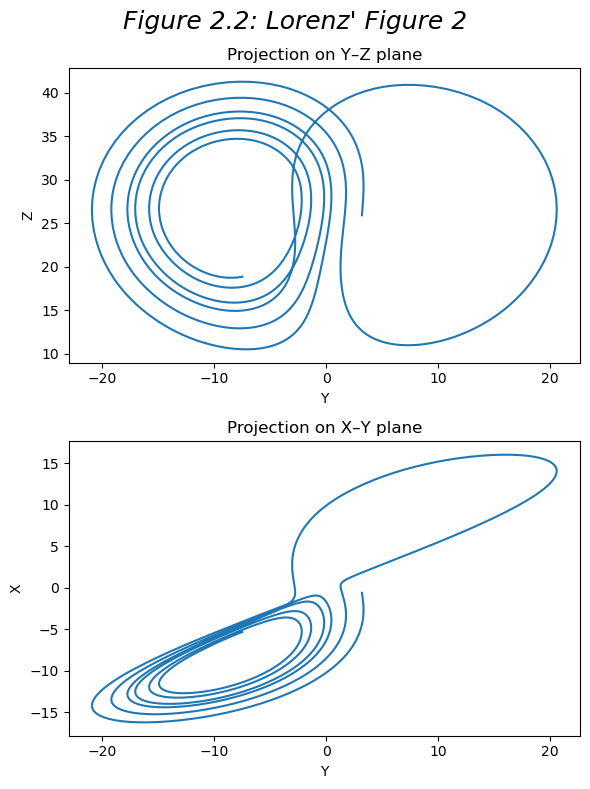

In [13]:
# Reproducing Lorenz' Figure 2: Phase-space projection of the x-y and y-z plane

# Closely spaced time intervals
sigma, r, b = 10., 28, 8./3.
sol = solve_ivp(fun=lorenz, t_span=(0, 19), y0=[0.0, 1.0, 0.0], args=(sigma, r, b), dense_output=True)  
t = np.linspace(14, 19, 1000)
W = sol.sol(t)
x, y, z = W

# Plot Lorenz' Fig 2 but with axes labels
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), dpi=100)

# Projection on Y–Z plane
ax1.plot(y, z)
ax1.set_xlabel('Y')  
ax1.set_ylabel('Z')
ax1.set_title('Projection on Y–Z plane'\n )   

# Projection on X–Y plane
ax2.plot(y, x)
ax2.set_ylabel('X')
ax2.set_xlabel('Y')
ax2.set_title('Projection on X–Y plane')

fig.suptitle('Figure 2.2: Lorenz\' Figure 2', fontstyle='italic', fontsize = 18)  # Figure for question 2 plot 2
plt.tight_layout()
plt.show()


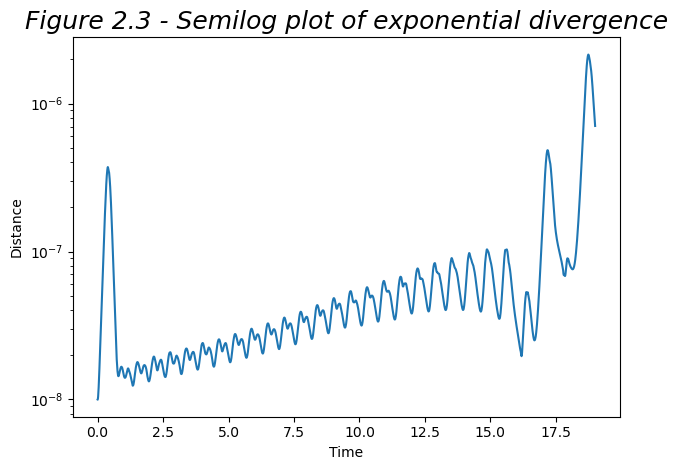

In [15]:
# Testing different initial conditions 

# Parameters and time setup
sigma, r, b = 10., 28, 8. / 3.
N = int(19 / dt)
t = np.linspace(0, 19, N + 1)

# Initial conditions
W0  = np.array([0.0, 1.0, 0.0])
W0p = np.array([0.0, 1.0 + 1e-8, 0.0])

# Integrate for solutions 
sol1 = solve_ivp(lorenz, [0, 19], W0, args=(sigma, r, b), t_eval=t)
sol2 = solve_ivp(lorenz, [0, 19], W0p, args=(sigma, r, b), t_eval=t)

# Turn solutions into 3xN arrays 
Y1 = sol1.y
Y2 = sol2.y

# Compute separation distance
distance = np.linalg.norm(Y1 - Y2, axis=0)

# Plot 
plt.semilogy(t, distance)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Figure 2.3 - Semilog plot of exponential divergence', fontstyle='italic', fontsize = 18)
plt.tight_layout()
plt.show()
